# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key


In [5]:
# lists to hold reponse information
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

In [6]:
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} with city name {city}")
    except:
        print("Record not found") 
        pass
        


Processing record 1 with city name alagoinhas
Processing record 2 with city name grand gaube
Processing record 3 with city name izhma
Processing record 4 with city name ushuaia
Processing record 5 with city name saint-augustin
Processing record 6 with city name bredasdorp
Processing record 7 with city name bronnoysund
Processing record 8 with city name high level
Processing record 9 with city name tuktoyaktuk
Processing record 10 with city name kapaa
Processing record 11 with city name hilo
Processing record 12 with city name torbay
Record not found
Processing record 13 with city name ust-karsk
Processing record 14 with city name taoudenni
Processing record 15 with city name olafsvik
Processing record 16 with city name yellowknife
Processing record 17 with city name nikolskoye
Processing record 18 with city name hermanus
Processing record 19 with city name pevek
Processing record 20 with city name hobart
Processing record 21 with city name port-gentil
Record not found
Processing record

Processing record 174 with city name ponta do sol
Processing record 175 with city name henties bay
Processing record 176 with city name tilichiki
Processing record 177 with city name faanui
Processing record 178 with city name richards bay
Processing record 179 with city name komsomolskiy
Processing record 180 with city name thinadhoo
Record not found
Processing record 181 with city name montgomery
Processing record 182 with city name bom jardim
Processing record 183 with city name pandan
Processing record 184 with city name mahebourg
Processing record 185 with city name yar-sale
Processing record 186 with city name coquimbo
Processing record 187 with city name severo-kurilsk
Processing record 188 with city name kahului
Processing record 189 with city name marawi
Processing record 190 with city name erzin
Processing record 191 with city name port augusta
Processing record 192 with city name geraldton
Processing record 193 with city name zhezkazgan
Processing record 194 with city name v

Processing record 343 with city name okha
Processing record 344 with city name tual
Processing record 345 with city name kieta
Processing record 346 with city name ternate
Processing record 347 with city name wawa
Processing record 348 with city name romny
Processing record 349 with city name bambous virieux
Processing record 350 with city name padilla
Processing record 351 with city name waddan
Processing record 352 with city name prince rupert
Record not found
Record not found
Processing record 353 with city name rocha
Processing record 354 with city name omaruru
Processing record 355 with city name ilo
Record not found
Processing record 356 with city name chuguyevka
Processing record 357 with city name liverpool
Processing record 358 with city name kungurtug
Processing record 359 with city name arica
Processing record 360 with city name okhotsk
Processing record 361 with city name vestmannaeyjar
Processing record 362 with city name lengshuitan
Processing record 363 with city name pa

Processing record 514 with city name rapid valley
Processing record 515 with city name kimbe
Processing record 516 with city name laem sing
Processing record 517 with city name gamboma
Processing record 518 with city name namatanai
Processing record 519 with city name keti bandar
Processing record 520 with city name skole
Processing record 521 with city name siguiri
Processing record 522 with city name niigata
Processing record 523 with city name butajira
Processing record 524 with city name christchurch
Processing record 525 with city name seminole
Processing record 526 with city name basco
Processing record 527 with city name beziers
Processing record 528 with city name bettiah
Processing record 529 with city name babushkin
Record not found
Record not found
Processing record 530 with city name tabou
Processing record 531 with city name kushiro
Processing record 532 with city name timmins
Processing record 533 with city name garmsar
Processing record 534 with city name marzuq
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert  and Display the DataFrame
 
weather_data = pd.DataFrame({
                        "City": cityname,
                        "Latitude": lat, 
                        "Longitude":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country, 
                        "Date":date
                        })
weather_data.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0      Alagoinhas  -12.1356   -38.4192     82.72        67           5   
1     Grand Gaube  -20.0064    57.6608     72.32        77          64   
2           Izhma   65.0083    53.9113     75.02        53          75   
3         Ushuaia  -54.8000   -68.3000     30.78        93          54   
4  Saint-Augustin   51.2260   -58.6502     56.86        62          98   

   Wind Speed Country        Date  
0        7.14      BR  1593874800  
1       23.67      MU  1593874800  
2        6.87      RU  1593874800  
3        3.56      AR  1593874800  
4        8.05      CA  1593874800

In [8]:
 #Export to a csv
weather_data.to_csv('..\output_data\my_weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
Humidity_Check = weather_data.loc[weather_data["Humidity"] > 100, :]

Humidity_Check.head()

Empty DataFrame
Columns: [City, Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [10]:
#  Get the indices of cities that have humidity over 100%.

# Skipped as no city with Humidity greater than 100%

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Skipped as no city with Humidity greater than 100%

In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


# Skipped as no city with Humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

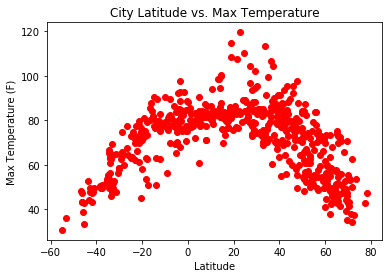

In [13]:
#Latitude vs. Temperature Plot

plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], Color = "r")
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('..\output_data\City Latitude vs Max Temperature.png')

plt.show()

# Latitude vs. Humidity Plot

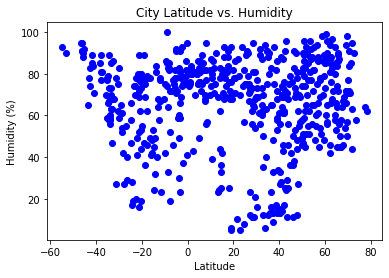

In [14]:
#Latitude vs. Humidity Plot

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], Color = "b")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('..\output_data\City Latitude vs Humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

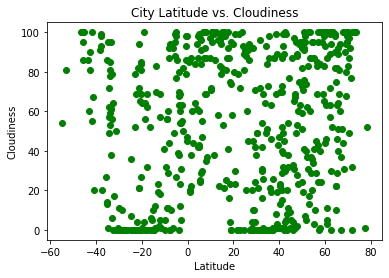

In [15]:
# Latitude vs. Cloudiness Plot

plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], Color = "g")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('..\output_data\City Latitude vs Cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

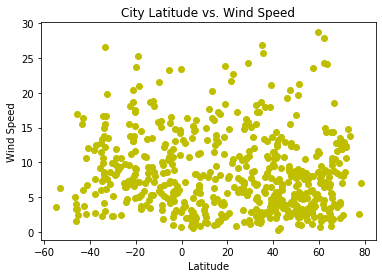

In [16]:
# Latitude vs. Wind Speed Plot

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], Color = "y")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig('..\output_data\City Latitude vs Wind Speed.png')

plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
  
    

In [18]:
# Create Northern and Southern Hemisphere DataFrames

northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
2           Izhma   65.0083    53.9113     75.02        53          75   
4  Saint-Augustin   51.2260   -58.6502     56.86        62          98   
6     Brønnøysund   65.4625    12.1997     54.55        64          29   
7      High Level   58.5169  -117.1360     54.68        98          95   
8     Tuktoyaktuk   69.4541  -133.0374     35.37        98          95   

   Wind Speed Country        Date  
2        6.87      RU  1593874800  
4        8.05      CA  1593874800  
6       14.38      NO  1593874800  
7        5.41      CA  1593874800  
8       13.56      CA  1593874800

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.678429536484986


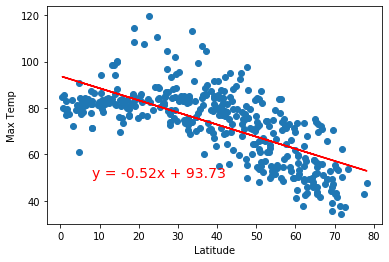

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(8,50))
plt.show()
plt.savefig('..\output_data\HM Nothern - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8373071246582093


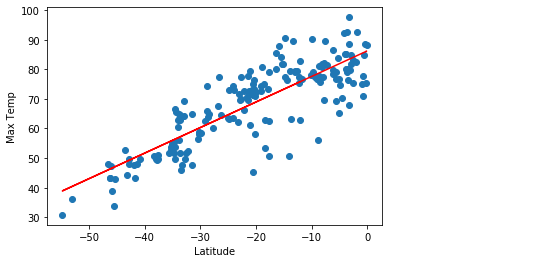

In [20]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(8,50))

plt.savefig('..\output_data\Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012348262282148368


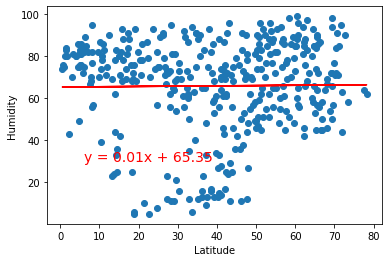

In [21]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))


plt.savefig('..\output_data\Hemisphere Northern - Humidity (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.12888787557557663


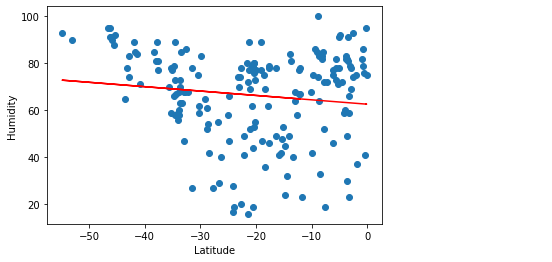

In [22]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(8,50))

plt.savefig('..\output_data\Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.005657220893867302


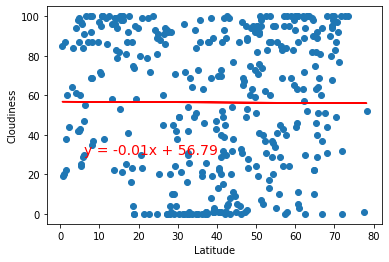

In [23]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('..\output_data\Hemisphere Northern - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10359711843714549


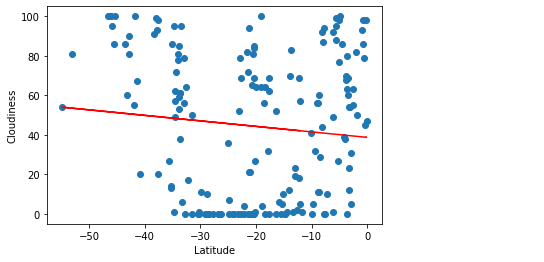

In [24]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(8,50))

plt.savefig('..\output_data\Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006209646120918814


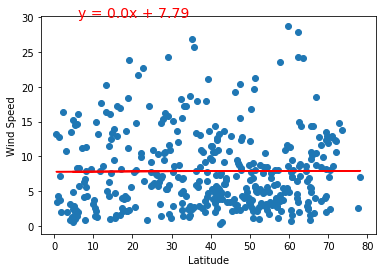

In [25]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))


plt.savefig('..\output_data\Hemisphere Northern- Wind Speed (mph) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03442347408697292


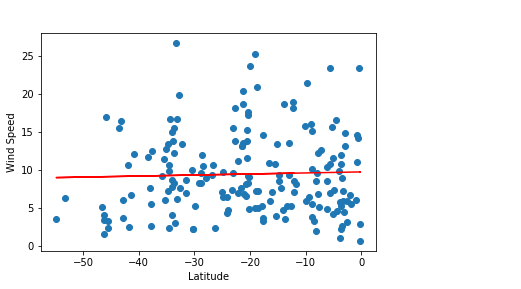

In [26]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))


plt.savefig('..\output_data\Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

In [27]:
print("Hurray! Completed all plots.")

Hurray! Completed all plots.
